####Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sqlite3
import json
import urllib
import pprint
from IPython.parallel import Client


%matplotlib inline

# Limit rows disp# Limit rows displayed in notebook
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 2)

#### Create sample of dataset to post on github.

In [3]:
# used to create sample of dataset to put in github
def create_sample(in_file, out_file_name):
    out_file = open(out_file_name, 'w')
    with open(in_file) as f:
        i = 0
        for line in f:
            while i < 50:
                json.dump(json.loads(line), out_file, sort_keys = True, indent=4, ensure_ascii=False)
                out_file.write('\n')
                i+=1
        
    return
# only run need to run this once
# create_sample(business_dataset_path, 'business_sample.json')
# create_sample(checkin_dataset_path, 'checkin_sample.json')
# create_sample(review_dataset_path, 'review_sample.json')
# create_sample(tip_dataset_path, 'tip_sample.json')
# create_sample(user_dataset_path, 'user_sample.json')


In [4]:
base_path = '/Users/aprilsong/Documents/data_science/yelp_dataset_challenge_academic_dataset/'
business_dataset_path = base_path + 'yelp_academic_dataset_business.json'
checkin_dataset_path = base_path + 'yelp_academic_dataset_checkin.json'
review_dataset_path = base_path + 'yelp_academic_dataset_review.json'
tip_dataset_path = base_path + 'yelp_academic_dataset_tip.json'
user_dataset_path = base_path + 'yelp_academic_dataset_user.json'

def json_parser(file):
    data = []
    with open(file) as f:
        for line in f:
            data.append(json.loads(line))
    return data

# # load JSON files 
# business_dataset = json_parser(business_dataset_path)
# checkin_dataset = json_parser(checkin_dataset_path)
# review_dataset = json_parser(review_dataset_path) 
# tip_dataset = json_parser(tip_dataset_path)
# user_dataset = json_parser(user_dataset_path)

# # create dataframes for datasets
# business_df = pd.DataFrame(business_dataset)
# checkin_df = pd.DataFrame(checkin_dataset)
# review_df = pd.DataFrame(review_dataset)
# tip_df = pd.DataFrame(tip_dataset)
# user_df = pd.DataFrame(user_dataset)

# save files to csv
business_df.to_csv('business_dataset.csv', sep='\t', encoding='utf-8')
checkin_df.to_csv('checkin_dataset.csv', sep='\t', encoding='utf-8')
review_df.to_csv('review_dataset.csv', sep='\t', encoding='utf-8')
tip_df.to_csv('tip_dataset.csv', sep='\t', encoding='utf-8')
user_df.to_csv('user_dataset.csv', sep='\t', encoding='utf-8')

# Cleaning the Business Data Set

In [5]:
print "Number of rows: %i" % business_df.shape[0]
print "Number of columns: %i" % business_df.shape[1]
business_df.head(20)

Number of rows: 61184
Number of columns: 15


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.5,-112.0,"Eric Goldberg, MD",[],True,9,3.5,AZ,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.4,-79.9,Clancy's Pub,[],True,4,3.5,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.4,-80.0,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,{},HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 S Hills Vlg\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.4,-80.1,Verizon Wireless,[],True,3,3.5,PA,business
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.4,-79.9,Emil's Lounge,[],True,11,4.5,PA,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,"{u'Take-out': True, u'Price Range': 2, u'Outdo...",WETE_LykpcnrC1sFcQ5EGg,"[Pubs, Irish, Nightlife, Bars, Restaurants]",Carnegie,"215 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.4,-80.1,Paddy's Pour House,[Carnegie],False,6,3.5,PA,business
16,{},6o3RK6rTcN3nw-j-r2nQmA,[],Carnegie,"231 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.4,-80.1,Porto Fino Pizzaria & Gyro,[Carnegie],True,4,2.5,PA,business
17,{u'Accepts Credit Cards': False},woOVJ0Z2f6XNCDntHA3b_g,"[Local Services, Sewing & Alterations]",Carnegie,"117 E Mall Plz\nCarnegie\nCarnegie, PA 15106","{u'Monday': {u'close': u'19:00', u'open': u'08...",40.4,-80.1,Alteration World,[Carnegie],True,5,5.0,PA,business
18,"{u'Take-out': True, u'Accepts Credit Cards': T...",rv7CY8G_XibTx82YhuqQRw,[Restaurants],Carnegie,"Raceway Plz\nCarnegie, PA 15106",{},40.4,-80.1,Long John Silver's,[],True,3,3.5,PA,business


In [6]:
business_df.dtypes

attributes     object
business_id    object
categories     object
...
stars    float64
state     object
type      object
Length: 15, dtype: object

In [7]:
business_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,6.1e+04,37,5.7,33,34,36,36,56
longitude,6.1e+04,-97,30,-1.2e+02,-1.2e+02,-1.1e+02,-81,8.5
open,61184,0.88,0.33,False,1,1,1,True
review_count,6.1e+04,28,89,3,4,8,21,4.6e+03
stars,6.1e+04,3.7,0.89,1,3,3.5,4.5,5


## Selecting U.S. Restaurants



In [5]:
# create dataframe restaurants in the U.S. which will be the focus of the rest of the project
us_array = business_df['state'].unique()[:7] #US States
del_rows = []

for i, row in business_df.iterrows():
    if 'Restaurants' not in row['categories']:
        del_rows.append(i)
    if row['state'] not in us_array:
        del_rows.append(i)

restaurants = business_df.drop(business_df.index[del_rows])
restaurants


print "Number of rows: %i" % restaurants.shape[0]
print "Number of columns: %i" % restaurants.shape[1]
restaurants.head(10)


Number of rows: 17670
Number of columns: 15


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.4,-79.9,Emil's Lounge,[],True,11,4.5,PA,business
5,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106",{},40.4,-80.1,Alexion's Bar & Grill,[Greentree],True,15,4.0,PA,business
9,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.4,-80.1,Kings Family Restaurant,[],True,8,3.5,PA,business
11,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",fNGIbpazjTRdXgwRY_NIXA,"[Bars, American (Traditional), Nightlife, Loun...",Carnegie,"1201 Washington Ave\nCarnegie, PA 15106",{},40.4,-80.1,Rocky's Lounge,[],True,5,4.0,PA,business
12,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.4,-80.1,Gab & Eat,[],True,38,4.5,PA,business
13,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",zaXDakTd3RXyOa7sMrUE1g,"[Cafes, Restaurants]",Carnegie,"202 3rd Ave\nCarnegie\nCarnegie, PA 15106",{},40.4,-80.1,Barb's Country Junction Cafe,[Carnegie],True,5,4.0,PA,business
15,"{u'Take-out': True, u'Price Range': 2, u'Outdo...",WETE_LykpcnrC1sFcQ5EGg,"[Pubs, Irish, Nightlife, Bars, Restaurants]",Carnegie,"215 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.4,-80.1,Paddy's Pour House,[Carnegie],False,6,3.5,PA,business
18,"{u'Take-out': True, u'Accepts Credit Cards': T...",rv7CY8G_XibTx82YhuqQRw,[Restaurants],Carnegie,"Raceway Plz\nCarnegie, PA 15106",{},40.4,-80.1,Long John Silver's,[],True,3,3.5,PA,business
20,"{u'Take-out': True, u'Alcohol': u'none', u'Noi...",SQ0j7bgSTazkVQlF5AnqyQ,"[Chinese, Restaurants]",Carnegie,"214 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.4,-80.1,Don Don Chinese Restaurant,[Carnegie],True,8,2.5,PA,business
21,"{u'Take-out': True, u'Accepts Credit Cards': T...",wqu7ILomIOPSduRwoWp4AQ,"[Breakfast & Brunch, American (Traditional), R...",Pittsburgh,"2180 Greentree Rd\nPittsburgh, PA 15220",{},40.4,-80.1,Denny's,[],True,7,4.0,PA,business


In [6]:
# reset the index of our new dataframe
restaurants = restaurants.reset_index()
restaurants.head()
del restaurants['index']


In [7]:
# find rows with no attributes
del_attr_rows = []
for i, v in restaurants['attributes'].iteritems():
    if not v:
        del_attr_rows.append(i)
        
print del_attr_rows[:]

print 
print "Rows for deletion: %i" % len(del_attr_rows)

[371, 418, 433, 628, 663, 675, 747, 894, 1186, 1299, 1491, 1584, 1629, 1714, 1752, 1816, 1958, 2100, 2155, 2335, 2385, 2392, 2559, 2606, 2714, 2825, 2955, 3090, 3242, 3266, 3357, 3454, 3626, 3709, 3722, 3724, 3834, 3976, 4049, 4052, 4366, 4485, 4552, 4585, 4664, 4699, 4908, 5105, 5133, 5364, 5420, 5448, 5704, 5896, 5987, 6003, 6009, 6174, 6178, 6195, 6281, 6540, 6561, 6654, 6686, 6724, 6733, 6932, 7244, 7623, 7857, 8070, 8539, 8633, 8913, 9346, 9434, 9483, 9580, 9777, 9853, 10125, 10129, 10130, 10145, 10176, 10189, 10289, 10318, 10345, 10355, 10364, 10372, 10377, 10380, 10420, 10513, 10524, 10561, 10564, 10605, 10702, 10735, 10750, 10764, 10776, 10786, 10841, 10947, 10971, 11011, 11024, 11052, 11122, 11164, 11188, 11206, 11210, 11243, 11267, 11354, 11419, 11647, 11888, 11951, 11967, 12028, 12154, 12176, 12527, 12907, 13154, 13224, 13379, 13426, 13480, 13493, 13536, 13739, 13853, 13905, 13962, 14021, 14101, 14188, 14281, 14347, 14413, 14467, 14503, 14544, 14711, 14756, 14782, 14833, 149

In [11]:
# check if above is accurate
print restaurants['attributes'][371]
print restaurants['attributes'][418]
print restaurants['attributes'][17437]


{}
{}
{}


In [8]:
# delete rows with empty attributes
restaurants_cleaned = restaurants.drop(restaurants.index[del_attr_rows])

restaurants_cleaned = restaurants_cleaned.reset_index()
del restaurants_cleaned['index']
print "Total rows: %i" % restaurants_cleaned.shape[0]
restaurants_cleaned.head()


Total rows: 17492


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.4,-79.9,Emil's Lounge,[],True,11,4.5,PA,business
1,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106",{},40.4,-80.1,Alexion's Bar & Grill,[Greentree],True,15,4.0,PA,business
2,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.4,-80.1,Kings Family Restaurant,[],True,8,3.5,PA,business
3,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",fNGIbpazjTRdXgwRY_NIXA,"[Bars, American (Traditional), Nightlife, Loun...",Carnegie,"1201 Washington Ave\nCarnegie, PA 15106",{},40.4,-80.1,Rocky's Lounge,[],True,5,4.0,PA,business
4,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.4,-80.1,Gab & Eat,[],True,38,4.5,PA,business


In [9]:
# drop the 'type' column since it is 'business' for all rows
del restaurants_cleaned['type']
print "Number of rows: %i" % restaurants_cleaned.shape[0]
print restaurants_cleaned.describe()
print restaurants_cleaned.dtypes


Number of rows: 17492
       latitude  longitude   open  review_count    stars
count   17492.0    17492.0  17492       17492.0  17492.0
mean       35.6     -105.1   0.78          58.3      3.4
std         2.7       13.7   0.41         134.6      0.7
min        32.9     -115.4  False           3.0      1.0
25%        33.5     -115.1      1           8.0      3.0
50%        35.2     -112.0      1          21.0      3.5
75%        36.1      -89.4      1          59.0      4.0
max        43.3      -79.9   True        4578.0      5.0
attributes     object
business_id    object
categories     object
...
review_count      int64
stars           float64
state            object
Length: 14, dtype: object


## Normalizing 'attributes' column

In [10]:
from pandas.io.json import json_normalize

attributes_norm = json_normalize(restaurants_cleaned['attributes'])
attributes_norm.head()


,Accepts Credit Cards,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,...,Payment Types.discover,Payment Types.mastercard,Payment Types.visa,Price Range,Smoking,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi
0,True,NaN,NaN,full_bar,False,False,False,False,False,False,...,NaN,NaN,NaN,1,no,True,False,True,NaN,no
1,True,NaN,NaN,full_bar,True,False,False,False,False,False,...,NaN,NaN,NaN,1,outdoor,True,False,True,NaN,free
2,True,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,True,False,True,True,NaN
3,True,NaN,NaN,full_bar,False,False,False,False,False,False,...,NaN,NaN,NaN,2,no,False,False,True,False,NaN
4,False,NaN,NaN,none,True,False,True,False,False,False,...,NaN,NaN,NaN,1,NaN,True,False,True,False,no


In [15]:
print "Number of rows: %i" % attributes_norm.shape[0]
print attributes_norm.describe()
print attributes_norm.dtypes

Number of rows: 17492
       Price Range
count      16813.0
mean           1.6
std            0.6
min            1.0
25%            1.0
50%            2.0
75%            2.0
max            4.0
Accepts Credit Cards    object
Accepts Insurance       object
Ages Allowed            object
...
Waiter Service           object
Wheelchair Accessible    object
Wi-Fi                    object
Length: 70, dtype: object


In [11]:
# join normalized attributes back to restaurants_cleaned dataframe
restaurants_cleaned = pd.merge(left=restaurants_cleaned, right=attributes_norm, how='outer', left_index=True, right_index=True)
restaurants_cleaned.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Payment Types.discover,Payment Types.mastercard,Payment Types.visa,Price Range,Smoking,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi
0,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.4,-79.9,Emil's Lounge,[],...,NaN,NaN,NaN,1,no,True,False,True,NaN,no
1,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106",{},40.4,-80.1,Alexion's Bar & Grill,[Greentree],...,NaN,NaN,NaN,1,outdoor,True,False,True,NaN,free
2,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.4,-80.1,Kings Family Restaurant,[],...,NaN,NaN,NaN,1,NaN,True,False,True,True,NaN
3,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",fNGIbpazjTRdXgwRY_NIXA,"[Bars, American (Traditional), Nightlife, Loun...",Carnegie,"1201 Washington Ave\nCarnegie, PA 15106",{},40.4,-80.1,Rocky's Lounge,[],...,NaN,NaN,NaN,2,no,False,False,True,False,NaN
4,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.4,-80.1,Gab & Eat,[],...,NaN,NaN,NaN,1,NaN,True,False,True,False,no


In [17]:
# spot checking merge
print restaurants_cleaned['attributes'][1]
print
restaurants_cleaned.iloc[1:2,15:]

{u'Alcohol': u'full_bar', u'Noise Level': u'loud', u'Music': {u'dj': False}, u'Attire': u'casual', u'Ambience': {u'romantic': False, u'intimate': False, u'touristy': False, u'hipster': False, u'divey': False, u'classy': False, u'trendy': False, u'upscale': False, u'casual': True}, u'Good for Kids': False, u'Price Range': 1, u'Good For Dancing': True, u'Delivery': False, u'Coat Check': False, u'Smoking': u'outdoor', u'Accepts Credit Cards': True, u'Take-out': True, u'Happy Hour': True, u'Outdoor Seating': True, u'Takes Reservations': False, u'Waiter Service': True, u'Wi-Fi': u'free', u'Caters': False, u'Good For': {u'dessert': False, u'latenight': False, u'lunch': False, u'dinner': True, u'breakfast': False, u'brunch': False}, u'Parking': {u'garage': False, u'street': False, u'validated': False, u'lot': True, u'valet': False}, u'Has TV': True, u'Good For Groups': True}



,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,...,Payment Types.discover,Payment Types.mastercard,Payment Types.visa,Price Range,Smoking,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi
1,NaN,NaN,full_bar,True,False,False,False,False,False,False,...,NaN,NaN,NaN,1,outdoor,True,False,True,NaN,free


In [18]:
index = attributes_norm.columns
print "Total number of business attributes: %i" %index.size
print
print index.values


Total number of business attributes: 70

[u'Accepts Credit Cards' u'Accepts Insurance' u'Ages Allowed' u'Alcohol'
 'Ambience.casual' 'Ambience.classy' 'Ambience.divey' 'Ambience.hipster'
 'Ambience.intimate' 'Ambience.romantic' 'Ambience.touristy'
 'Ambience.trendy' 'Ambience.upscale' u'Attire' u'BYOB' u'BYOB/Corkage'
 u'By Appointment Only' u'Caters' u'Coat Check' u'Corkage' u'Delivery'
 'Dietary Restrictions.dairy-free' 'Dietary Restrictions.gluten-free'
 'Dietary Restrictions.halal' 'Dietary Restrictions.kosher'
 'Dietary Restrictions.soy-free' 'Dietary Restrictions.vegan'
 'Dietary Restrictions.vegetarian' u'Dogs Allowed' u'Drive-Thru'
 u'Good For Dancing' u'Good For Groups' u'Good For Kids'
 'Good For.breakfast' 'Good For.brunch' 'Good For.dessert'
 'Good For.dinner' 'Good For.latenight' 'Good For.lunch' u'Good for Kids'
 u'Happy Hour' u'Has TV' 'Music.background_music' 'Music.dj'
 'Music.jukebox' 'Music.karaoke' 'Music.live' 'Music.playlist'
 'Music.video' u'Noise Level' u'Open 2

In [19]:
single = []
nested = []
for v in index.values:
    if '.' in v:
        nested.append(v)
    else:
        single.append(v)
print single
print nested

[u'Accepts Credit Cards', u'Accepts Insurance', u'Ages Allowed', u'Alcohol', u'Attire', u'BYOB', u'BYOB/Corkage', u'By Appointment Only', u'Caters', u'Coat Check', u'Corkage', u'Delivery', u'Dogs Allowed', u'Drive-Thru', u'Good For Dancing', u'Good For Groups', u'Good For Kids', u'Good for Kids', u'Happy Hour', u'Has TV', u'Noise Level', u'Open 24 Hours', u'Order at Counter', u'Outdoor Seating', u'Price Range', u'Smoking', u'Take-out', u'Takes Reservations', u'Waiter Service', u'Wheelchair Accessible', u'Wi-Fi']
['Ambience.casual', 'Ambience.classy', 'Ambience.divey', 'Ambience.hipster', 'Ambience.intimate', 'Ambience.romantic', 'Ambience.touristy', 'Ambience.trendy', 'Ambience.upscale', 'Dietary Restrictions.dairy-free', 'Dietary Restrictions.gluten-free', 'Dietary Restrictions.halal', 'Dietary Restrictions.kosher', 'Dietary Restrictions.soy-free', 'Dietary Restrictions.vegan', 'Dietary Restrictions.vegetarian', 'Good For.breakfast', 'Good For.brunch', 'Good For.dessert', 'Good For.di

In [20]:
# create a dictionary for the attributes with values
# key = attribute
# value = list of values
# ie {'Ambience': ['casual', 'classy', 'divey'], 'Good For': ['breakfast', 'brunch', 'dessert']}
attr_dict = {}
for v in nested:
    words = v.split('.')
    if words[0] not in attr_dict.keys():
        attr_dict[words[0]] = [words[1]]
    else:
        attr_dict[words[0]].append(words[1])

attr_dict

{'Ambience': ['casual',
  'classy',
  'divey',
  'hipster',
  'intimate',
  'romantic',
  'touristy',
  'trendy',
  'upscale'],
 'Dietary Restrictions': ['dairy-free',
  'gluten-free',
  'halal',
  'kosher',
  'soy-free',
  'vegan',
  'vegetarian'],
 'Good For': ['breakfast',
  'brunch',
  'dessert',
  'dinner',
  'latenight',
  'lunch'],
 'Music': ['background_music',
  'dj',
  'jukebox',
  'karaoke',
  'live',
  'playlist',
  'video'],
 'Parking': ['garage', 'lot', 'street', 'valet', 'validated'],
 'Payment Types': ['amex', 'cash_only', 'discover', 'mastercard', 'visa']}

In [21]:
attribute_values = {}
for i in index.values:
    attribute_values[i] = attributes_norm[i].unique()
attribute_values

{u'Accepts Credit Cards': array([True, False, nan], dtype=object),
 u'Accepts Insurance': array([nan, False], dtype=object),
 u'Ages Allowed': array([nan, u'21plus', u'18plus', u'allages'], dtype=object),
 u'Alcohol': array([u'full_bar', u'none', u'beer_and_wine', nan], dtype=object),
 'Ambience.casual': array([False, True, nan], dtype=object),
 'Ambience.classy': array([False, nan, True], dtype=object),
 'Ambience.divey': array([False, nan, True], dtype=object),
 'Ambience.hipster': array([False, nan, True], dtype=object),
 'Ambience.intimate': array([False, nan, True], dtype=object),
 'Ambience.romantic': array([False, nan, True], dtype=object),
 'Ambience.touristy': array([False, nan, True], dtype=object),
 'Ambience.trendy': array([False, nan, True], dtype=object),
 'Ambience.upscale': array([False, nan, True], dtype=object),
 u'Attire': array([u'casual', nan, u'dressy', u'formal'], dtype=object),
 u'BYOB': array([nan, False, True], dtype=object),
 u'BYOB/Corkage': array([nan, u'ye

In [22]:
attributes_norm.dtypes

Accepts Credit Cards    object
Accepts Insurance       object
Ages Allowed            object
...
Waiter Service           object
Wheelchair Accessible    object
Wi-Fi                    object
Length: 70, dtype: object

## Normalize 'hours' column

In [12]:
hours_norm = json_normalize(restaurants_cleaned['hours'])
hours_norm.head()

,Friday.close,Friday.open,Monday.close,Monday.open,Saturday.close,Saturday.open,Sunday.close,Sunday.open,Thursday.close,Thursday.open,Tuesday.close,Tuesday.open,Wednesday.close,Wednesday.open
0,20:00,10:00,NaN,NaN,16:00,10:00,NaN,NaN,19:00,10:00,19:00,10:00,19:00,10:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02:00,08:00,02:00,08:00,02:00,08:00,02:00,08:00,02:00,08:00,02:00,08:00,02:00,08:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14:30,06:00,14:30,06:00,12:30,06:00,12:30,07:00,14:30,06:00,14:30,06:00,14:30,06:00


In [24]:
hours_norm.dtypes

Friday.close    object
Friday.open     object
Monday.close    object
...
Tuesday.open       object
Wednesday.close    object
Wednesday.open     object
Length: 14, dtype: object

In [13]:
cols = ['Monday.open', 'Monday.close', 'Tuesday.open', 'Tuesday.close', 'Wednesday.open', 'Wednesday.close',
         'Thursday.open', 'Thursday.close', 'Friday.open', 'Friday.close', 'Saturday.open', 'Saturday.close', 'Sunday.open', 'Sunday.close']
hours_norm = hours_norm[cols]
print "Number of rows: %i" % hours_norm.shape[0]
hours_norm.head()


Number of rows: 17492


,Monday.open,Monday.close,Tuesday.open,Tuesday.close,Wednesday.open,Wednesday.close,Thursday.open,Thursday.close,Friday.open,Friday.close,Saturday.open,Saturday.close,Sunday.open,Sunday.close
0,NaN,NaN,10:00,19:00,10:00,19:00,10:00,19:00,10:00,20:00,10:00,16:00,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08:00,02:00,08:00,02:00,08:00,02:00,08:00,02:00,08:00,02:00,08:00,02:00,08:00,02:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06:00,14:30,06:00,14:30,06:00,14:30,06:00,14:30,06:00,14:30,06:00,12:30,07:00,12:30


In [14]:
# join hours_norm to restaurants_cleaned dataframe
restaurants_cleaned = pd.merge(left=restaurants_cleaned, right=hours_norm, how='outer', left_index=True, right_index=True)
print "Number of rows: %i" % restaurants_cleaned.shape[0]
restaurants_cleaned.head()

Number of rows: 17492


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Wednesday.open,Wednesday.close,Thursday.open,Thursday.close,Friday.open,Friday.close,Saturday.open,Saturday.close,Sunday.open,Sunday.close
0,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.4,-79.9,Emil's Lounge,[],...,10:00,19:00,10:00,19:00,10:00,20:00,10:00,16:00,NaN,NaN
1,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106",{},40.4,-80.1,Alexion's Bar & Grill,[Greentree],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.4,-80.1,Kings Family Restaurant,[],...,08:00,02:00,08:00,02:00,08:00,02:00,08:00,02:00,08:00,02:00
3,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",fNGIbpazjTRdXgwRY_NIXA,"[Bars, American (Traditional), Nightlife, Loun...",Carnegie,"1201 Washington Ave\nCarnegie, PA 15106",{},40.4,-80.1,Rocky's Lounge,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.4,-80.1,Gab & Eat,[],...,06:00,14:30,06:00,14:30,06:00,14:30,06:00,12:30,07:00,12:30


## Normalizing 'categories' column

In [15]:
restaurant_cats = pd.DataFrame(restaurants_cleaned['categories'])
restaurant_cats.describe()

,categories
count,17492
unique,2601
top,"[Mexican, Restaurants]"
freq,1414


In [28]:
restaurant_cats.head()

,categories
0,"[Bars, American (New), Nightlife, Lounges, Res..."
1,"[Bars, American (Traditional), Nightlife, Rest..."
2,"[Burgers, Breakfast & Brunch, American (Tradit..."
3,"[Bars, American (Traditional), Nightlife, Loun..."
4,"[Breakfast & Brunch, Restaurants]"


In [16]:
def list_normalize(col):
    """This is similar to the json_normalize method but for lists.
    
    :param col: A series, the column of the dataframe we want to normalize.
    :returns: A DataFrame of the columns normalized.
    """
    data = []
    temp_df = pd.DataFrame(col)
    for i, row in temp_df.iterrows():
        cat_dict = {}
        for val in row[0]:
            cat_dict[val] = 1    
        data.append(cat_dict)
    return pd.DataFrame(data)


categories_norm = list_normalize(restaurant_cats['categories'])
print "Number of rows: %i" % categories_norm.shape[0]
categories_norm.head()
            
        
    

Number of rows: 17492


,Active Life,Adult Entertainment,Afghan,African,Airports,American (New),American (Traditional),Amusement Parks,Appliances,Arabian,...,Uzbek,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Wedding Planning,Wine Bars,Wineries,Yoga
0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# join categories_norm to restaurants_cleaned
restaurants_cleaned = pd.merge(left=restaurants_cleaned, right=categories_norm, how='outer', left_index=True, right_index=True)
print "Number of rows: %i" % restaurants_cleaned.shape[0]
restaurants_cleaned.head()

Number of rows: 17492


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Uzbek,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Wedding Planning,Wine Bars,Wineries,Yoga
0,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.4,-79.9,Emil's Lounge,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106",{},40.4,-80.1,Alexion's Bar & Grill,[Greentree],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.4,-80.1,Kings Family Restaurant,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",fNGIbpazjTRdXgwRY_NIXA,"[Bars, American (Traditional), Nightlife, Loun...",Carnegie,"1201 Washington Ave\nCarnegie, PA 15106",{},40.4,-80.1,Rocky's Lounge,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.4,-80.1,Gab & Eat,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
categories_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Active Life,36,1,0,1,1,1,1,1
Adult Entertainment,1,1,NaN,1,1,1,1,1
Afghan,11,1,0,1,1,1,1,1
African,14,1,0,1,1,1,1,1
Airports,1,1,NaN,1,1,1,1,1
...,...,...,...,...,...,...,...,...
Vietnamese,188,1,0,1,1,1,1,1
Wedding Planning,2,1,0,1,1,1,1,1
Wine Bars,129,1,0,1,1,1,1,1
Wineries,2,1,0,1,1,1,1,1


## Normalizing 'neighborhood' column

In [18]:
restaurant_nbh = pd.DataFrame(restaurants_cleaned['neighborhoods'])
restaurant_nbh.head()


,neighborhoods
0,[]
1,[Greentree]
2,[]
3,[]
4,[]


In [33]:
restaurant_nbh.describe()


,neighborhoods
count,17492
unique,173
top,[]
freq,10941


In [19]:
neighborhood_norm = list_normalize(restaurants_cleaned['neighborhoods'])
neighborhood_norm.head()

,Allentown,Allied Dunn's Marsh,Anthem,Arboretum,Aspinwall,Ballantyne,Banksville,Bay Creek,Beechview,Bellevue,...,Walnut Grove,West End,West View,Westchester Gardens,Westhaven Trails,Westmorland,Westside,Wexford,Williamson - Marquette,Willy St
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
neighborhood_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Allentown,4,1,0,1,1,1,1,1
Allied Dunn's Marsh,2,1,0,1,1,1,1,1
Anthem,156,1,0,1,1,1,1,1
Arboretum,48,1,0,1,1,1,1,1
Aspinwall,9,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...
Westmorland,2,1,0,1,1,1,1,1
Westside,482,1,0,1,1,1,1,1
Wexford,10,1,0,1,1,1,1,1
Williamson - Marquette,49,1,0,1,1,1,1,1


In [36]:
neighborhood_norm.dtypes

Allentown              float64
Allied Dunn's Marsh    float64
Anthem                 float64
...
Wexford                   float64
Williamson - Marquette    float64
Willy St                  float64
Length: 141, dtype: object

## Handling NaN's for attributes

In [24]:
# restaurants = restaurants_cleaned
restaurants_cleaned.to_pickle('restaurant/restaurant_data_cleaned.pkl')
# pd.DataFrame(restaurants.describe())


In [38]:
s = [restaurants['stars'].describe(), restaurants['American (New)'].describe()]
d = {restaurants['stars'].name : restaurants['stars'].describe(), restaurants['American (New)'].name: restaurants['American (New)'].describe()}
df = pd.DataFrame(d)
df

,American (New),stars
count,1472,17492.0
mean,1,3.4
std,0,0.7
min,1,1.0
25%,1,3.0
50%,1,3.5
75%,1,4.0
max,1,5.0


In [39]:
series = restaurants['stars']

In [40]:
series.name

u'stars'

# Cleaning Review Data Set

In [41]:
review_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,vcNAWiLM4dR7D2nwwJ7nCA,2007-05-17,15SdjuK7DmYqUAj6rjGowg,5,dr. goldberg offers everything i look for in a...,review,Xqd0DzHaiyRqVH3WRG7hzg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
1,vcNAWiLM4dR7D2nwwJ7nCA,2010-03-22,RF6UnRTtG7tWMcrO2GEoAg,2,"Unfortunately, the frustration of being Dr. Go...",review,H1kH6QZV7Le4zqTRNxoZow,"{u'funny': 0, u'useful': 2, u'cool': 0}"
2,vcNAWiLM4dR7D2nwwJ7nCA,2012-02-14,-TsVN230RCkLYKBeLsuz7A,4,Dr. Goldberg has been my doctor for years and ...,review,zvJCcrpm2yOZrxKffwGQLA,"{u'funny': 0, u'useful': 1, u'cool': 1}"
3,vcNAWiLM4dR7D2nwwJ7nCA,2012-03-02,dNocEAyUucjT371NNND41Q,4,Been going to Dr. Goldberg for over 10 years. ...,review,KBLW4wJA_fwoWmMhiHRVOA,"{u'funny': 0, u'useful': 0, u'cool': 0}"
4,vcNAWiLM4dR7D2nwwJ7nCA,2012-05-15,ebcN2aqmNUuYNoyvQErgnA,4,Got a letter in the mail last week that said D...,review,zvJCcrpm2yOZrxKffwGQLA,"{u'funny': 0, u'useful': 2, u'cool': 1}"


In [22]:
# only want reviews for restaurants in U.S.
us_rest_ids = restaurants_cleaned['business_id']
rest_reviews = pd.merge(left=pd.DataFrame(us_rest_ids), right=review_df, how='inner', left_on='business_id', right_on='business_id')
rest_reviews.head(10)

rest_reviews['business_id'][0].dtype

AttributeError: 'unicode' object has no attribute 'dtype'

In [43]:
rest_reviews.describe()

,stars
count,939942.0
mean,3.7
std,1.3
min,1.0
25%,3.0
50%,4.0
75%,5.0
max,5.0


In [44]:

def dict_normalize(col):
    """This is similar to the json_normalize method but for dictionaries.
    
    :param col: A series, the column of the dataframe we want to normalize.
    :returns: A DataFrame of the columns normalized.
    """
    data = []
    for i, val_dict in col.iteritems():   
        data.append(val_dict)
    return pd.DataFrame(data)

votes_norm = dict_normalize(rest_reviews['votes'])
votes_norm.head()

,cool,funny,useful
0,0,0,5
1,0,0,0
2,1,0,2
3,0,0,1
4,0,0,0


In [45]:
votes_norm.describe()

,cool,funny,useful
count,939942.0,939942.0,939942
mean,0.6,0.5,1
std,1.6,1.5,2
min,0.0,0.0,0
25%,0.0,0.0,0
50%,0.0,0.0,0
75%,1.0,0.0,1
max,137.0,141.0,166


In [46]:
rest_reviews = pd.merge(left=rest_reviews, right=votes_norm, how='inner', left_index=True, right_index=True)
rest_reviews.head()

,business_id,date,review_id,stars,text,type,user_id,votes,cool,funny,useful
0,mVHrayjG3uZ_RLHkLj-AMg,2012-12-01,6w6gMZ3iBLGcUM4RBIuifQ,5,This place was DELICIOUS!! My parents saw a r...,review,LWbYpcangjBMm4KPxZGOKg,"{u'funny': 0, u'useful': 5, u'cool': 0}",0,0,5
1,mVHrayjG3uZ_RLHkLj-AMg,2013-03-15,jVVv_DA5mCDB6mediuwHAw,5,Can't miss stop for the best Fish Sandwich in ...,review,m1FpV3EAeggaAdfPx0hBRQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
2,mVHrayjG3uZ_RLHkLj-AMg,2013-03-30,3Es8GsjkssusYgeU6_ZVpQ,5,This place should have a lot more reviews - bu...,review,8fApIAMHn2MZJFUiCQto5Q,"{u'funny': 0, u'useful': 2, u'cool': 1}",1,0,2
3,mVHrayjG3uZ_RLHkLj-AMg,2013-10-20,KAkcn7oQP1xX8KsZ-XmktA,4,This place was very good. I found out about Em...,review,uK8tzraOp4M5u3uYrqIBXg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,0,1
4,mVHrayjG3uZ_RLHkLj-AMg,2013-11-07,BZNJkkP0bXnwQ2-sCqat2Q,5,"Old school.....traditional ""mom 'n pop"" qualit...",review,6wvlM5L4_EroGXbnb_92xQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0


In [47]:
rest_reviews[['stars', 'cool', 'funny', 'useful']].describe().T

,count,mean,std,min,25%,50%,75%,max
stars,939942,3.7,1.3,1,3,4,5,5
cool,939942,0.6,1.6,0,0,0,1,137
funny,939942,0.5,1.5,0,0,0,0,141
useful,939942,1.0,2.0,0,0,0,1,166


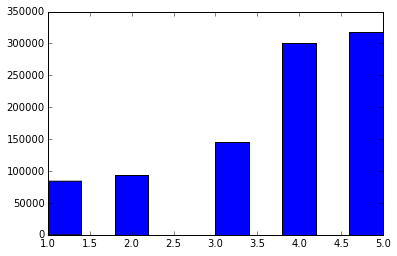

In [48]:
plt.hist(rest_reviews['stars']);

In [49]:
# grouped_stars = rest_reviews.groupby('stars')
# stars_1 = grouped_stars.get_group(1)
# stars_2 = grouped_stars.get_group(2)    
# stars_3 = grouped_stars.get_group(3)
# stars_4 = grouped_stars.get_group(4) 
# stars_5 = grouped_stars.get_group(5)
grouped_stars.groups.count().plot(kind='bar')

NameError: name 'grouped_stars' is not defined

## Apply LDA

In [50]:
from sklearn.cross_validation import train_test_split

# get restaurant reviews
train_data, test_data = train_test_split(rest_reviews, test_size=0.2)
train_data = pd.DataFrame(train_data, columns=rest_reviews.columns)
test_data = pd.DataFrame(test_data, columns=rest_reviews.columns)

In [51]:
print (train_data.shape[0])
train_data.head()

751953


,business_id,date,review_id,stars,text,type,user_id,votes,cool,funny,useful
0,bGj9djLAHjNR55OXsIDrAg,2013-09-02,3_92Ah-zCDQYJ8bc6n9HSA,1,Came for breakfast with the fam.\nfirst impres...,review,Tib7jzBh4OA7KYXpHvgoPw,"{u'funny': 1, u'useful': 3, u'cool': 0}",0,1,3
1,U605aUo9MJn5vgLfP3yYKg,2010-06-25,nDMOjyXJzb9fmKF3RtUvCQ,4,"OK, I'll admit it, I get my once a week Culver...",review,THYIqfnLV54VZ_v2hCfq2Q,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
2,UrxAu3jjRM_u6iQXDPzkSQ,2010-10-16,uUd4wzqV0BUz-z30XCJY7w,5,I think it says something that my friend has s...,review,KJZftTc-ct3fT4shisBb9Q,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,0,1
3,wc6MUrDdAtQLqKUDn4F0ew,2012-12-21,3XzNT6DsjgzTMBHP-EztUQ,5,Both my wife and I's burgers we had were great...,review,utUKpUtyrWKaQyDHGJYOeQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
4,n7tBHCvezCT4YophjHxciA,2011-04-14,O4XIfBVe1XXZwQncQuKeiA,5,Went their last night with a friend and loved ...,review,7hr9Tglvivr8d7EbMoABYA,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,0,1


In [52]:
print test_data.shape[0]
test_data.head()

187989


,business_id,date,review_id,stars,text,type,user_id,votes,cool,funny,useful
0,LZMzNNI5NYsW1cEJ-go6og,2008-10-20,EMDzYp6mWC-JGkh7yymTJA,4,"Not enough to raise a star but the ""new"" wood ...",review,J72XoQspNBmPsX2iKl2YvA,"{u'funny': 1, u'useful': 2, u'cool': 2}",2,1,2
1,G1_uulnhkAUBsaMAlJFc_g,2013-08-05,oh1RFPmCi5m4XK3_kWiRdQ,4,I had the pleasure of being introduced to this...,review,9m4xWSlBQ23-Z9yTdwEC-g,"{u'funny': 1, u'useful': 2, u'cool': 1}",1,1,2
2,YBFK526tkKzd7AandD4-2g,2013-06-19,bNdiwPBmarOJ6Msw9fNVQw,3,Service was pretty good but the price changes ...,review,Y39PxIaFN4MylD9DE0WZng,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
3,tJhh6NDsNIwWMpxlP-0F7g,2014-09-13,eZoXZeA2aVfIT4MYTMf79Q,4,Best fish tacos I've had out side of Hawaii! ...,review,inZLW2Ivot03RG83gnf7UA,"{u'funny': 0, u'useful': 1, u'cool': 1}",1,0,1
4,V6BYjHM9SnXscfkln3hCdA,2010-10-25,RNRjluDjjRV-z_t4ucp05A,4,Do not expect to have a quick breakfast or lun...,review,PNS9z4aFDbfhpIsHCfNvNg,"{u'funny': 1, u'useful': 2, u'cool': 1}",1,1,2


In [53]:
from gensim import corpora, models, similarities
import regex as re
import nltk
from nltk.corpus import stopwords

# nltk.download()

def remove_punctuation(text):
    return re.sub(ur"\p{P}+", "", text)


# remove all punctuation
train_data['text']=train_data['text'].apply(lambda text: remove_punctuation(text).lower())
train_data.text

documents = train_data['text'].values

In [61]:
# remove stop words
# stopwords = stopwords.words('english')
# texts = [[word for word in document.lower().split() if word not in stopwords]
#           for document in documents[:5]]

texts

[[u'came',
  u'breakfast',
  u'fam',
  u'first',
  u'impression',
  u'wow',
  u'ambiance',
  u'ended',
  u'billion',
  u'dollar',
  u'hotel',
  u'got',
  u'better',
  u'service',
  u'food',
  u'quality',
  u'local',
  u'dennys',
  u'server',
  u'looked',
  u'like',
  u'beat',
  u'50',
  u'yr',
  u'old',
  u'lady',
  u'hair',
  u'sticking',
  u'everywhere',
  u'attentive',
  u'professional',
  u'like',
  u'workers',
  u'wynn',
  u'restaurant',
  u'hotel',
  u'ordered',
  u'steak',
  u'eggs',
  u'nothing',
  u'special',
  u'wife',
  u'got',
  u'veggie',
  u'egg',
  u'whites',
  u'meh',
  u'sons',
  u'pancakes',
  u'good',
  u'bottom',
  u'line',
  u'place',
  u'ripoff',
  u'dont',
  u'get',
  u'wrong',
  u'dont',
  u'mind',
  u'spending',
  u'$$$',
  u'quality',
  u'food',
  u'place',
  u'biggg',
  u'disappoint',
  u'bill',
  u'came',
  u'$70',
  u'750',
  u'plain',
  u'apple',
  u'juice',
  u'450',
  u'folders',
  u'water',
  u'coffee',
  u'450',
  u'awful',
  u'cappuccino',
  u'beware'

In [ ]:
dictionary = corpora.Dictionary(texts)
dictionary.save('reviewtext.dict')

corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('reviewtext.mm', corpus)

In [ ]:
stopwords = stopwords.words('english')


In [ ]:
for text in train_data.text[:20]:
    print text

In [ ]:
stopwords

In [ ]:
# more_words = set("came way dad yes try oh phoenix one two three four\
# th alot well wasn went now doesn know want give take said lo r w\
# co st v o b c g p bf ok k l n x f didn m nice restaurant back food\
# good great place don always a about above after again against all am\
# and any are at as be because been before being below between both but\
# by can cant cannot could couldnt do did does down each for from further\
# had have here how if me no nor not our of the and to too i is in into\
# on there then them themselves this it he she her him you so some that\
# was with would more or they will do has which an embedded quote its\
# embed dont out who whom why where when his very other only while their\
# http www up com than my your also most mostly never next what much\
# one such many us were we over own often should shall same that those\
# under until when won d re s t ll ve im these just isnt ive theres go\
# going get got however made meanwhile please perhaps see seem seems\
# thru even doesnt hes wouldnt thats youre wasnt youll really got like\ 
# make makes think around through didnt doing may might maybe wont u arent\ 
# werent ill las vegas pittsburgh ive hed shed itd place boyfriend girlfriend bf\
# gf friend wtf lol".split())
# more_words